str_data=['안 녕 하 세 요1023'].str.replace('[^ㄱ-ㅎ ㅏ-ㅣ 가-힣]','')

In [1]:
import codecs
import pandas as pd
with codecs.open('ratings_test.txt',encoding='utf-8') as f:
    data=[i.split('\t') for i in f.read().splitlines()]
    m=data[0]
    data=data[1:]
m

['id', 'document', 'label']

In [2]:
p_data=pd.DataFrame(data,columns=m)
p_data

,id,document,label
0,6270596,굳 ㅋ,1
1,9274899,GDNTOPCLASSINTHECLUB,0
2,8544678,뭐야 이 평점들은.... 나쁘진 않지만 10점 짜리는 더더욱 아니잖아,0
3,6825595,지루하지는 않은데 완전 막장임... 돈주고 보기에는....,0
4,6723715,3D만 아니었어도 별 다섯 개 줬을텐데.. 왜 3D로 나와서 제 심기를 불편하게 하죠??,0
...,...,...,...
49995,4608761,오랜만에 평점 로긴했네ㅋㅋ 킹왕짱 쌈뽕한 영화를 만났습니다 강렬하게 육쾌함,1
49996,5308387,의지 박약들이나 하는거다 탈영은 일단 주인공 김대희 닮았고 이등병 찐따 OOOO,0
49997,9072549,그림도 좋고 완성도도 높았지만... 보는 내내 불안하게 만든다,0
49998,5802125,절대 봐서는 안 될 영화.. 재미도 없고 기분만 잡치고.. 한 세트장에서 다 해먹네,0


1. 토큰화 : 입력데이터에서 피쳐정리
2. 데이터 전처리
3. 모델 생성 학습
4. 그래프모델 표현

In [3]:
from konlpy.tag import Okt    

In [4]:
m=Okt()
c=0
end_d=[]
for i in p_data['document']:
    l=[]
    l1=[]
    k=m.morphs(i)
    for j in k:
        if len(j) >1:
            if j != '..':
                if j != '...':
                    if j != '....':
                        l.append(j)
    합=""
    for j in l:
        
        합 = 합+ ' ' + j
    l1.append(합)
    end_d.append(l1)


In [5]:
from tensorflow.keras.utils import to_categorical
end_dd=pd.DataFrame(end_d,columns=['document'])
X_data=end_dd['document'].values
y_data=p_data['label'].values

In [20]:
from tensorflow.keras.preprocessing.text import Tokenizer
tk=Tokenizer(num_words=5000)
tk.fit_on_texts(X_data)
t_x_data=tk.texts_to_matrix(X_data,mode='tfidf')
t_x_data

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 1.51465693, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [7]:
y_data=to_categorical(y_data)
y_data

array([[0., 1.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]], dtype=float32)

In [21]:
from sklearn.model_selection import train_test_split
t_x,tt_x,t_y,tt_y=train_test_split(t_x_data,y_data,random_state=1)

In [22]:
t_x.shape,t_y.shape

((37500, 5000), (37500, 2))

In [24]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras import optimizers 
m=Sequential()
m.add(Dense(256,input_shape=(5000,),activation='relu'))
m.add(Dropout(0.5))
m.add(Dense(128,activation='relu'))
m.add(Dropout(0.5))
m.add(Dense(2,activation='sigmoid'))
m.compile(optimizer='adam',loss='binary_crossentropy',
          metrics=['binary_accuracy'])
hy=m.fit(t_x,t_y,epochs=10,validation_data=(tt_x,tt_y))

Epoch 1/10
1172/1172 [==============================] - 9s 7ms/step - loss: 0.4772 - binary_accuracy: 0.7667 - val_loss: 0.4100 - val_binary_accuracy: 0.8058
Epoch 2/10
1172/1172 [==============================] - 9s 8ms/step - loss: 0.3509 - binary_accuracy: 0.8358 - val_loss: 0.4242 - val_binary_accuracy: 0.8016
Epoch 3/10
1172/1172 [==============================] - 9s 8ms/step - loss: 0.2941 - binary_accuracy: 0.8626 - val_loss: 0.4782 - val_binary_accuracy: 0.8000
Epoch 4/10
1172/1172 [==============================] - 8s 7ms/step - loss: 0.2424 - binary_accuracy: 0.8864 - val_loss: 0.5086 - val_binary_accuracy: 0.7991
Epoch 5/10
1172/1172 [==============================] - 8s 7ms/step - loss: 0.1982 - binary_accuracy: 0.9051 - val_loss: 0.6144 - val_binary_accuracy: 0.7996
Epoch 6/10
1172/1172 [==============================] - 8s 7ms/step - loss: 0.1625 - binary_accuracy: 0.9243 - val_loss: 0.7099 - val_binary_accuracy: 0.7965
Epoch 7/10
1172/1172 [==============================

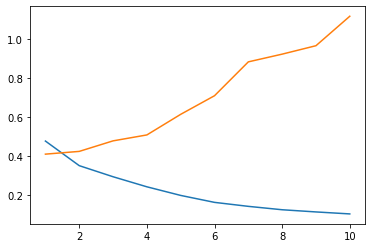

In [25]:
#mode=tfidf, num_words=5000
import matplotlib.pyplot as plt
x=range(1,len(hy.history['loss'])+1)
plt.plot(x,hy.history['loss'])
plt.plot(x,hy.history['val_loss'])

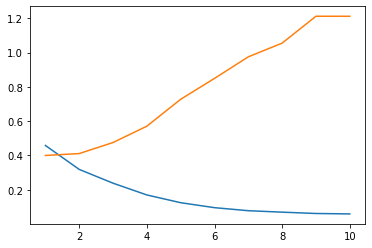

In [16]:
#mode=binary, num_words=10000
import matplotlib.pyplot as plt
x=range(1,len(hy.history['loss'])+1)
plt.plot(x,hy.history['loss'])
plt.plot(x,hy.history['val_loss'])

In [ ]:
#위와 같이 발산하는것은 오버피팅된것때문이다. 이를 없애기 위해서는 편향된 쓸모없는 피쳐를 제거해줘야한다.